In [88]:
import numpy as np
import pandas as pd

In [89]:
data = pd.read_csv('games-release-ALL.csv')
data = data.sample(frac=1).reset_index(drop=True)
data = data[:10000]
data.head()

,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating
0,5443,In Nightmare,/app/1817290/,Nov 29 2022,15,42,4,4,78.34%
1,39089,Rain of Fire,/app/1170870/,Oct 28 2019,3,2,0,0,64.08%
2,59082,Quarterback SNAP,/app/482210/,Aug 26 2016,4,5,2,2,59.97%
3,3271,Netherverse,/app/1071620/,Mar 9 2023,7,2,8,8,34.58%
4,25026,Taoyuan Adventure,/app/1591400/,Apr 15 2021,2,1,2,2,44.31%


In [90]:
data.isna().sum()

Unnamed: 0          0
game                0
link                0
release             0
peak_players        0
positive_reviews    0
negative_reviews    0
total_reviews       0
rating              0
dtype: int64

In [91]:
data['negative_reviews'] = data['negative_reviews'].replace(r'\D','',regex=True).astype(float)
data['positive_reviews'] = data['positive_reviews'].replace(r'\D','',regex=True).astype(float)
data = data[(data['negative_reviews'] > 0) & (data['positive_reviews'] > 0)]

In [92]:
data['reviews_ratio'] = data['negative_reviews'].astype(float) / data['positive_reviews'].astype(float)
data = data.drop(['Unnamed: 0', 'negative_reviews', 'positive_reviews', 'total_reviews'], axis=1)
data.head()

,game,link,release,peak_players,rating,reviews_ratio
0,In Nightmare,/app/1817290/,Nov 29 2022,15,78.34%,0.095238
2,Quarterback SNAP,/app/482210/,Aug 26 2016,4,59.97%,0.400000
3,Netherverse,/app/1071620/,Mar 9 2023,7,34.58%,4.000000
4,Taoyuan Adventure,/app/1591400/,Apr 15 2021,2,44.31%,2.000000
5,Bloodstained: Ritual of the Night,/app/692850/,Jun 18 2019,"26,934",92.70%,0.056692


In [93]:
data['peak_players'] = data['peak_players'].replace({',': ''}, regex=True)
# Convert the columns to numeric (optional, if needed)
data['peak_players'] = data['peak_players'].apply(pd.to_numeric, errors='ignore')
data.head()

,game,link,release,peak_players,rating,reviews_ratio
0,In Nightmare,/app/1817290/,Nov 29 2022,15,78.34%,0.095238
2,Quarterback SNAP,/app/482210/,Aug 26 2016,4,59.97%,0.400000
3,Netherverse,/app/1071620/,Mar 9 2023,7,34.58%,4.000000
4,Taoyuan Adventure,/app/1591400/,Apr 15 2021,2,44.31%,2.000000
5,Bloodstained: Ritual of the Night,/app/692850/,Jun 18 2019,26934,92.70%,0.056692


In [94]:
# Drop name and link to the game
data = data.drop(['game', 'link'], axis=1)
data.head()

,release,peak_players,rating,reviews_ratio
0,Nov 29 2022,15,78.34%,0.095238
2,Aug 26 2016,4,59.97%,0.400000
3,Mar 9 2023,7,34.58%,4.000000
4,Apr 15 2021,2,44.31%,2.000000
5,Jun 18 2019,26934,92.70%,0.056692


In [95]:
# Convert date
data['release'] = pd.to_datetime(data['release'])
data['release_year'] = data['release'].apply(lambda x: x.year)
data['release_month'] = data['release'].apply(lambda x: x.month)
data['release_day'] = data['release'].apply(lambda x: x.day)
data = data.drop('release', axis=1)
data.head()

,peak_players,rating,reviews_ratio,release_year,release_month,release_day
0,15,78.34%,0.095238,2022,11,29
2,4,59.97%,0.400000,2016,8,26
3,7,34.58%,4.000000,2023,3,9
4,2,44.31%,2.000000,2021,4,15
5,26934,92.70%,0.056692,2019,6,18


In [96]:
data['rating'] = data['rating'].replace({'%': ''}, regex=True)
data['rating'] = data['rating'].apply(pd.to_numeric, errors='ignore')
data.head()

,peak_players,rating,reviews_ratio,release_year,release_month,release_day
0,15,78.34,0.095238,2022,11,29
2,4,59.97,0.400000,2016,8,26
3,7,34.58,4.000000,2023,3,9
4,2,44.31,2.000000,2021,4,15
5,26934,92.70,0.056692,2019,6,18


In [97]:
data = data.apply(pd.to_numeric, errors='ignore')
data.head()

,peak_players,rating,reviews_ratio,release_year,release_month,release_day
0,15,78.34,0.095238,2022,11,29
2,4,59.97,0.400000,2016,8,26
3,7,34.58,4.000000,2023,3,9
4,2,44.31,2.000000,2021,4,15
5,26934,92.70,0.056692,2019,6,18


In [98]:
data.drop('release_day', axis=1, inplace=True)
data.head()

,peak_players,rating,reviews_ratio,release_year,release_month
0,15,78.34,0.095238,2022,11
2,4,59.97,0.400000,2016,8
3,7,34.58,4.000000,2023,3
4,2,44.31,2.000000,2021,4
5,26934,92.70,0.056692,2019,6


<Axes: xlabel='release_month'>

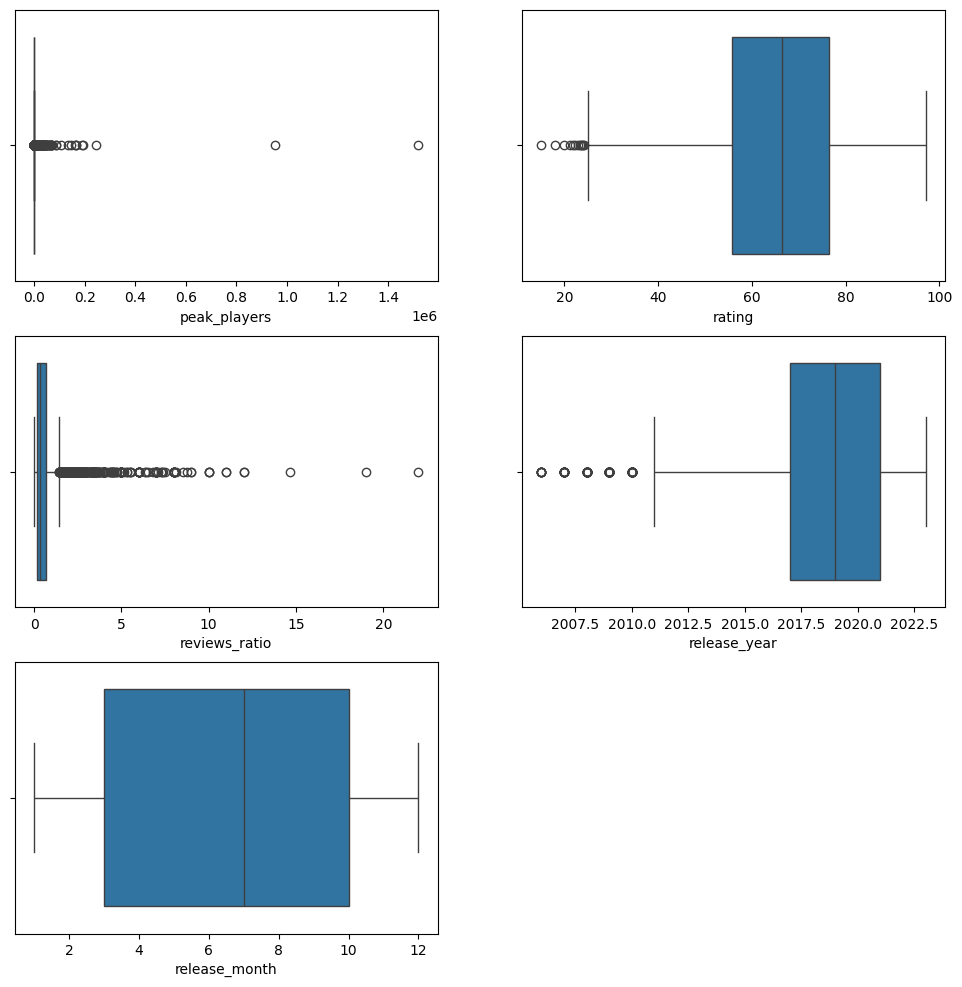

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
sns.boxplot(data=data, x='peak_players')

plt.subplot(3, 2, 2)
sns.boxplot(data=data, x='rating')

plt.subplot(3, 2, 3)
sns.boxplot(data=data, x='reviews_ratio')

plt.subplot(3, 2, 4)
sns.boxplot(data=data, x='release_year')

plt.subplot(3, 2, 5)
sns.boxplot(data=data, x='release_month')

### Target Frequency

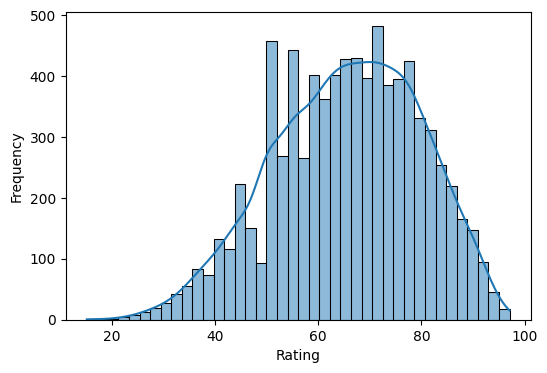

In [100]:
plt.figure(figsize=(6, 4))
sns.histplot(data["rating"], kde=True)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Correlation matrix

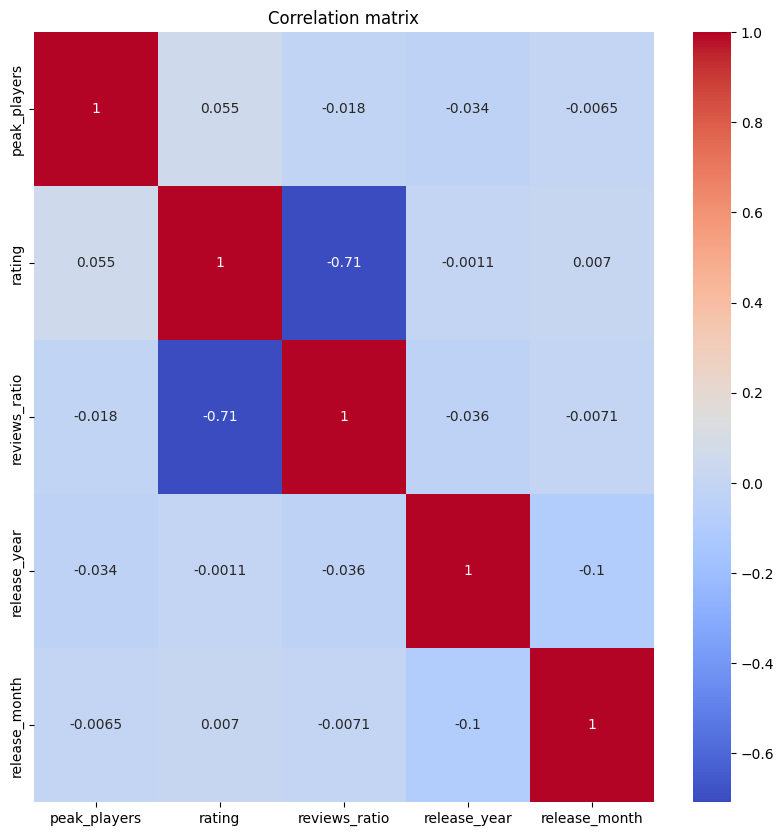

In [101]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

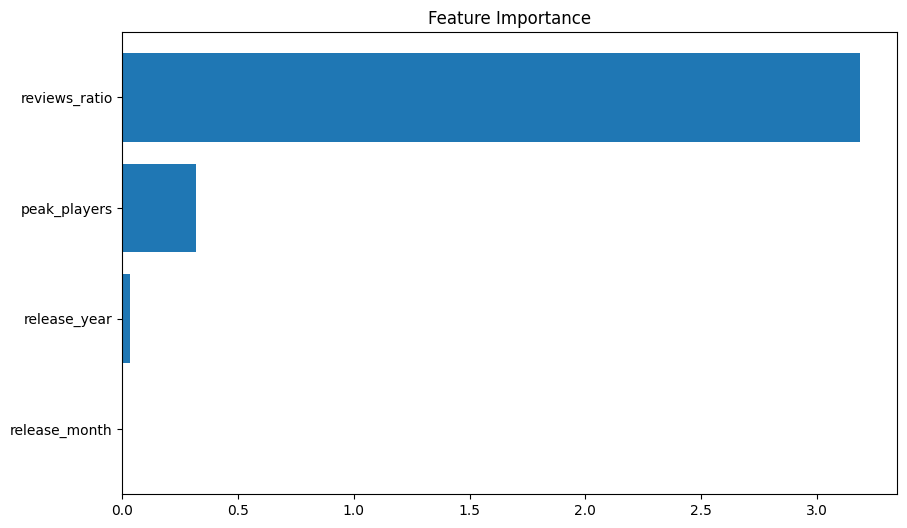

In [102]:
from sklearn.feature_selection import mutual_info_regression

x = data.drop(['rating'], axis=1)
y = data['rating']
# Вычисление важности признаков с использованием mutual information на ваших данных X_train и y_train 
mutual_info = mutual_info_regression(x, y, random_state=42)
# Создание DataFrame для отображения результатов
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': mutual_info})
# Сортировка по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)
# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance')
plt.show()

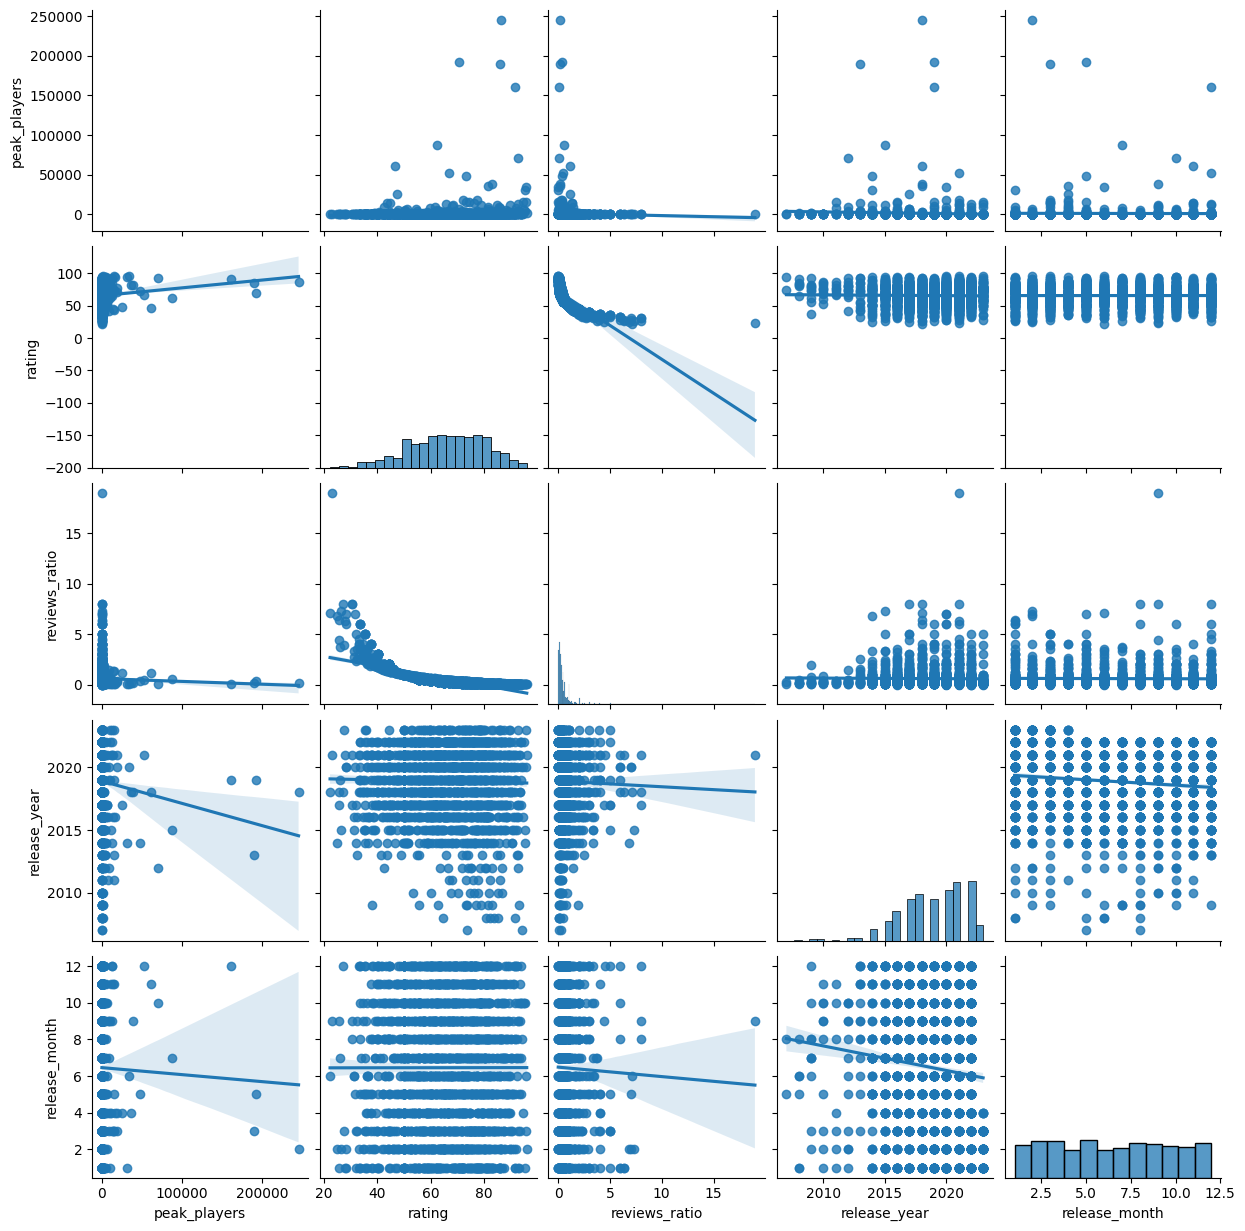

In [103]:
sns.pairplot(data[2000:4000], kind="reg") 

In [104]:
data = pd.get_dummies(data, columns=['release_year', 'release_month'], dtype=int)

In [105]:
data.head()

,peak_players,rating,reviews_ratio,release_year_2006,release_year_2007,release_year_2008,release_year_2009,release_year_2010,release_year_2011,release_year_2012,...,release_month_3,release_month_4,release_month_5,release_month_6,release_month_7,release_month_8,release_month_9,release_month_10,release_month_11,release_month_12
0,15,78.34,0.095238,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4,59.97,0.400000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7,34.58,4.000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2,44.31,2.000000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,26934,92.70,0.056692,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [106]:
x = data.drop('rating', axis=1)
y = data['rating']

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [108]:
x_train_scaled = x_train.loc[:, ['peak_players', 'reviews_ratio']]
x_test_scaled = x_test.loc[:, ['peak_players', 'reviews_ratio']]

In [109]:
# Compute the mean and standard deviation of the training set then transform it
scaler_linear = StandardScaler().fit(x_train_scaled)
x_train_scaled = scaler_linear.transform(x_train_scaled)
x_test_scaled = scaler_linear.transform(x_test_scaled)
x_train = np.concatenate((x_train_scaled, x_train.drop(['peak_players', 'reviews_ratio'], axis=1).to_numpy()), axis=1)
x_test = np.concatenate((x_test_scaled, x_test.drop(['peak_players', 'reviews_ratio'], axis=1).to_numpy()), axis=1)

In [110]:
result = pd.DataFrame({'Model':[], 'MSE':[], 'MAE':[], 'R2':[]})

In [111]:
def test_model(model, x_train, y_train, x_test, y_test):
    # Train the model
    model.fit(x_train, y_train)

    # Feed the scaled training set and get the predictions
    y_hat = model.predict(x_test)

    test_mse = mean_squared_error(y_test, y_hat)
    test_mae = mean_absolute_error(y_test, y_hat)
    test_r2 = r2_score(y_test,y_hat)
    return test_mse, test_mae, test_r2

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from tqdm import tqdm

models = []
linear = LinearRegression()
decision_tree = DecisionTreeRegressor()
rendom_forest = RandomForestRegressor()
svr = SVR()
k_neighbors = KNeighborsRegressor()
mlp = MLPRegressor()
gradient_boosting = GradientBoostingRegressor()
models.append(linear)
models.append(decision_tree)
models.append(rendom_forest)
models.append(svr)
models.append(k_neighbors)
models.append(mlp)
models.append(gradient_boosting)

for model in tqdm(models):
    test_mse, test_mae, test_r2 = test_model(model, x_train, y_train, x_test, y_test)
    result.loc[len(result.index)] = [str(model), test_mse, test_mae, test_r2] 

 57%|█████▋    | 4/7 [00:13<00:12,  4.01s/it]c:\Users\das-s\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████| 7/7 [00:16<00:00,  2.41s/it]


In [113]:
result.sort_values(by=['MSE', 'MAE'])

,Model,MSE,MAE,R2
6,GradientBoostingRegressor(),3.661982,1.389459,0.981768
2,RandomForestRegressor(),3.756269,1.317842,0.981298
1,DecisionTreeRegressor(),6.173593,1.604557,0.969263
5,MLPRegressor(),13.475604,2.756879,0.932907
4,KNeighborsRegressor(),20.018363,3.322754,0.900332
3,SVR(),24.502344,3.435290,0.878007
0,LinearRegression(),97.436302,7.778598,0.514881


In [114]:
import torch
import torch.nn as nn
from torch.optim import Adam

In [115]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [116]:
x_train = torch.tensor(x_train).float().to(device)
x_test = torch.tensor(x_test).float().to(device)
y_train = torch.tensor(y_train.to_numpy()).float().to(device)
y_test = torch.tensor(y_test.to_numpy()).float().to(device)

In [136]:
class NN(nn.Module):
    def __init__(self, input):
        super(NN, self).__init__()
        self.fc1 = nn.Sequential(nn.Linear(input, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.3),
                                 nn.Linear(512, 128),
                                 nn.ReLU(),
                                 nn.Dropout(0.3),
                                 nn.Linear(128, 16),
                                 nn.ReLU(),
                                 nn.Linear(16, 1))

    def forward(self, x):
        x = self.fc1(x)
        return x

In [140]:
model_nn = NN(len(x_train[0]))
model_nn.to(device)

NN(
  (fc1): Sequential(
    (0): Linear(in_features=32, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=512, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=128, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [142]:
optimizer = Adam(params=model_nn.parameters(), lr=1e-3)
loss_func = nn.MSELoss()
losses = []

In [143]:
num_iter = 400
train_loop = tqdm(range(num_iter))
train_loop.set_description_str("Model training")
for i in train_loop:
    outputs = model_nn(x_train)
    loss = loss_func(outputs, y_train)
    losses.append(loss.item())
    train_loop.set_postfix_str(f"Current error = {loss.item()}")
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

Model training: 100%|██████████| 400/400 [00:24<00:00, 16.30it/s, Current error = 230.9152374267578] 


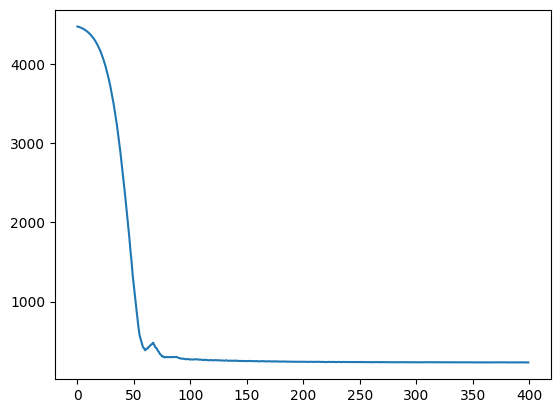

In [144]:
plt.plot(losses)

In [163]:
import random 
j = random.randint(0, len(y_test)-1)

print(f"\nReal rating = {y_test[j].item()}")
print(f"Predicted rating = {model_nn(x_test[j]).item()}")


Real rating = 58.75
Predicted rating = 72.44418334960938


In [164]:
results = model_nn(x_test).cpu().detach().numpy()
y_real = y_test.cpu().detach().numpy()
mse = mean_squared_error(y_real, results)
mae = mean_absolute_error(y_real, results)
r2 = r2_score(y_real, results)

print(f"mse =\t{mse}\nmae =\t{mae}\nr2 =\t{r2}")

mse =	222.562744140625
mae =	12.071578025817871
r2 =	-0.10810351106660354
